In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [45]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [46]:
houses_df = pd.DataFrame(data.data, columns=data.feature_names)

houses_df['HouseVal'] = pd.DataFrame(data.target, columns=['HouseVal'])

In [47]:
houses_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


# Pre Processing the Data

In [48]:
houses_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Checking For Outliers by creating Boxplot Subplots

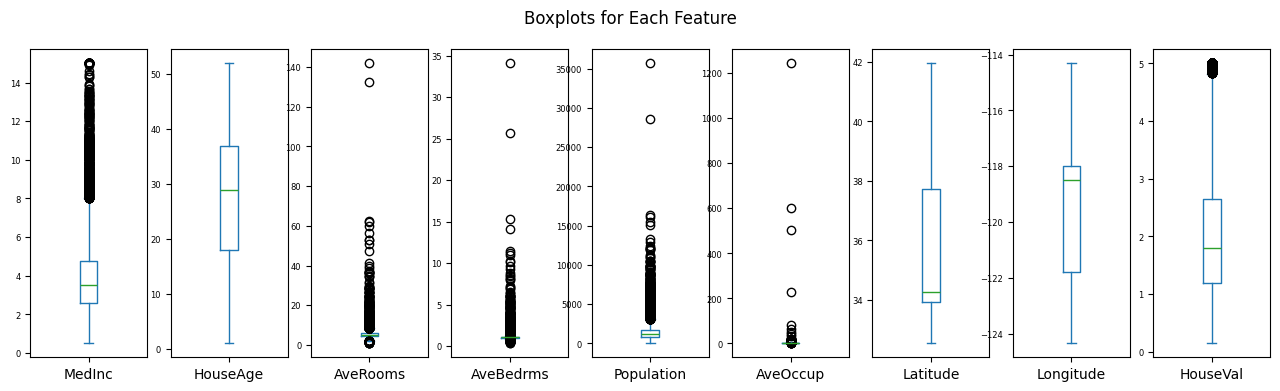

In [49]:
fig, axes = plt.subplots(1, houses_df.shape[1], figsize=(16, 4))
for i, (col, ax) in enumerate(zip(houses_df.columns, axes)):
    houses_df[col].plot(kind='box', ax=ax)
    ax.tick_params(axis='y', labelsize=6)

plt.suptitle('Boxplots for Each Feature')
plt.show()

In [50]:
houses_df = houses_df[(houses_df['AveRooms'] < 80) &
                        (houses_df['AveBedrms'] < 25) &
                        (houses_df['Population'] < 25000) &
                        (houses_df['AveOccup'] < 200)]

In [51]:
print(f"Count after dropping outlier: {houses_df.shape[0]}")


Count after dropping outlier: 20632


Correlation Matrix

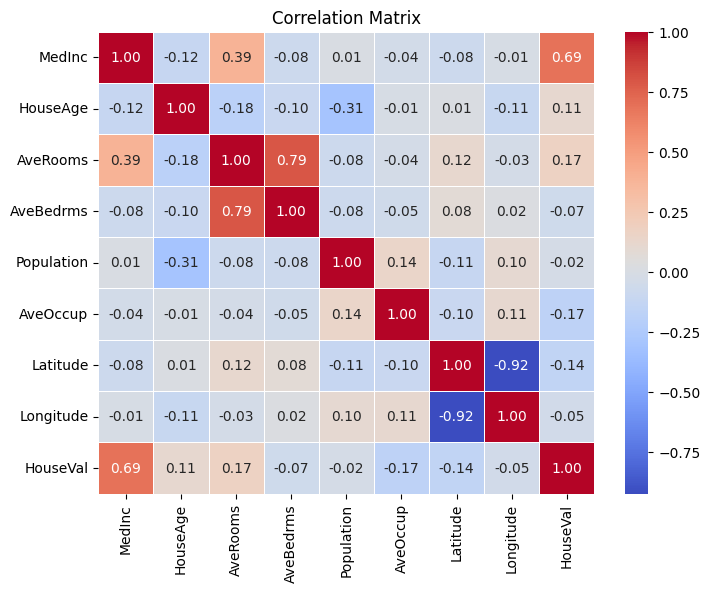

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(houses_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Splitting Data

In [53]:
X = houses_df.drop(columns=['HouseVal'], axis=1)
y = houses_df['HouseVal']

In [54]:
#Splitting into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16505, 8), (4127, 8), (16505,), (4127,))

In [55]:
#Splitting the data into Test and Validation sets

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((13204, 8), (3301, 8), (13204,), (3301,))

# Standarization

In [56]:
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_val = standard.transform(X_val)
X_test = standard.transform(X_test)

Converting to Pytorch Tensors

# Model Creation

In [70]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [71]:
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)

In [72]:
input_size = X_train_tensor.shape[1]
model = RegressionModel(input_size)

In [73]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [75]:
def train(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):

        model.train()
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = criterion(predictions, y_train)
        loss.backward()
        optimizer.step()


        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val)
            val_loss = criterion(val_predictions, y_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")
    return train_losses, val_losses

In [77]:
epochs = 100
train_losses, val_losses = train(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([13204])) that is different to the input size (torch.Size([13204, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([3301])) that is different to the input size (torch.Size([3301, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10/100, Loss: 1.5777, Validation Loss: 1.5213
Epoch 20/100, Loss: 1.4670, Validation Loss: 1.4735
Epoch 30/100, Loss: 1.4072, Validation Loss: 1.3677
Epoch 40/100, Loss: 1.3672, Validation Loss: 1.3404
Epoch 50/100, Loss: 1.3535, Validation Loss: 1.3334
Epoch 60/100, Loss: 1.3435, Validation Loss: 1.3226
Epoch 70/100, Loss: 1.3398, Validation Loss: 1.3181
Epoch 80/100, Loss: 1.3381, Validation Loss: 1.3164
Epoch 90/100, Loss: 1.3371, Validation Loss: 1.3155
Epoch 100/100, Loss: 1.3365, Validation Loss: 1.3149


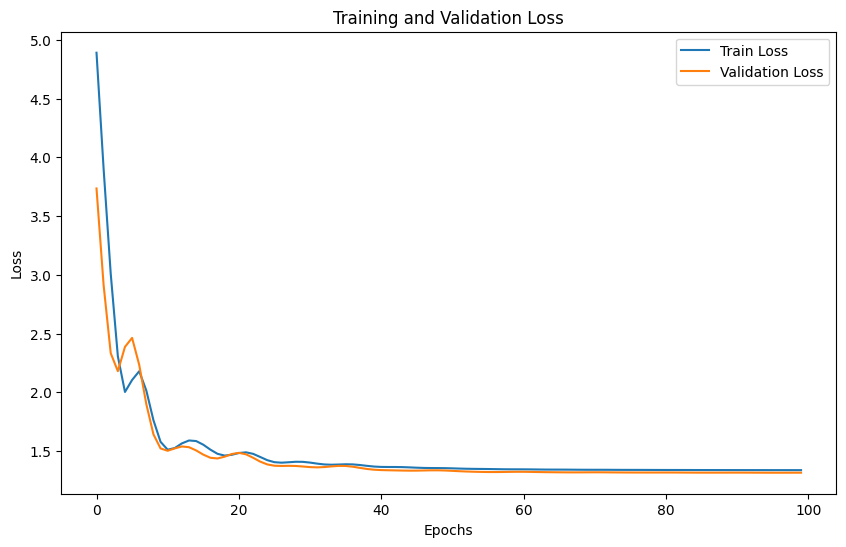

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [80]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor).squeeze()
    mse = mean_squared_error(y_test_tensor.numpy(), test_predictions.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), test_predictions.numpy())
    r2 = r2_score(y_test_tensor.numpy(), test_predictions.numpy())
    print(f"Test MSE: {mse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R^2: {r2:.4f}")


Test MSE: 1.3339
Test MAE: 0.9160
Test R^2: 0.0023


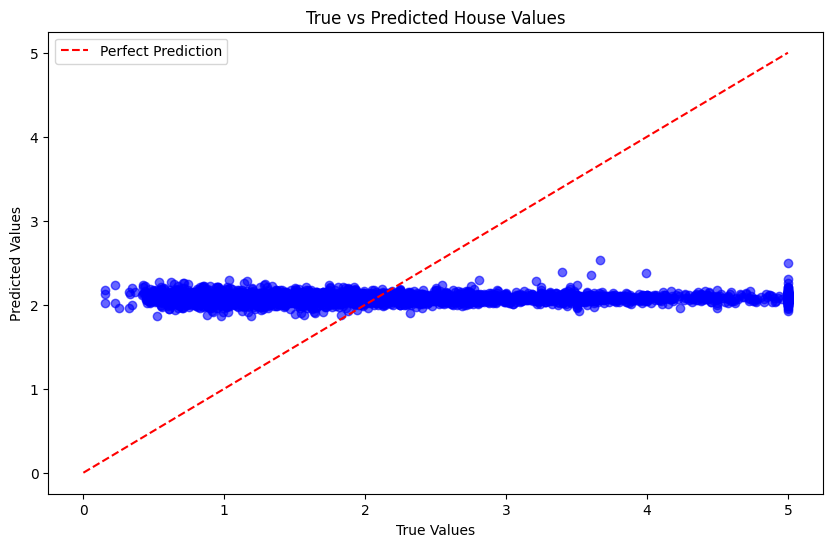

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_tensor.numpy(), test_predictions.numpy(), alpha=0.6, color='blue')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted House Values')
plt.legend()
plt.show()